In [6]:
from epyc import JSONLabNotebook
import epyc
import epydemic
import numpy as np
import pandas as pd
from epydemic import SEIR, SIR, ERNetwork, Monitor, ProcessSequence
import matplotlib.pyplot as plt
from parameters import *

In [7]:
json_lab = JSONLabNotebook(get_out_path("ex_2_seir"), create=False)
dfs = [json_lab.dataframe(tag=rs) for rs in json_lab.resultSets()]
df_1 = pd.concat(dfs)

In [8]:
json_lab_2 = JSONLabNotebook("../sec_7_1_test_trace_and_isolate/datasets/ex_3_seir.json", create=False)
json_lab_3 = JSONLabNotebook("../sec_7_1_test_trace_and_isolate/datasets/ex_4_seir.json", create=False)

In [9]:
dfs_1 = [json_lab_2.dataframe(tag=rs) for rs in json_lab_2.resultSets()]
dfs_2 = [json_lab_3.dataframe(tag=rs) for rs in json_lab_3.resultSets()]
dfs = dfs_1 + dfs_2
df_2 = pd.concat(dfs)

/tmp/ipykernel_347355/1503083112.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  ax2.plot(mean_1, 'k.', marker="s", label="Ensemble Average",  markersize=3)
/tmp/ipykernel_347355/1503083112.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(mean_2, 'k.', marker="s", label="Ensemble Average",  markersize=3)


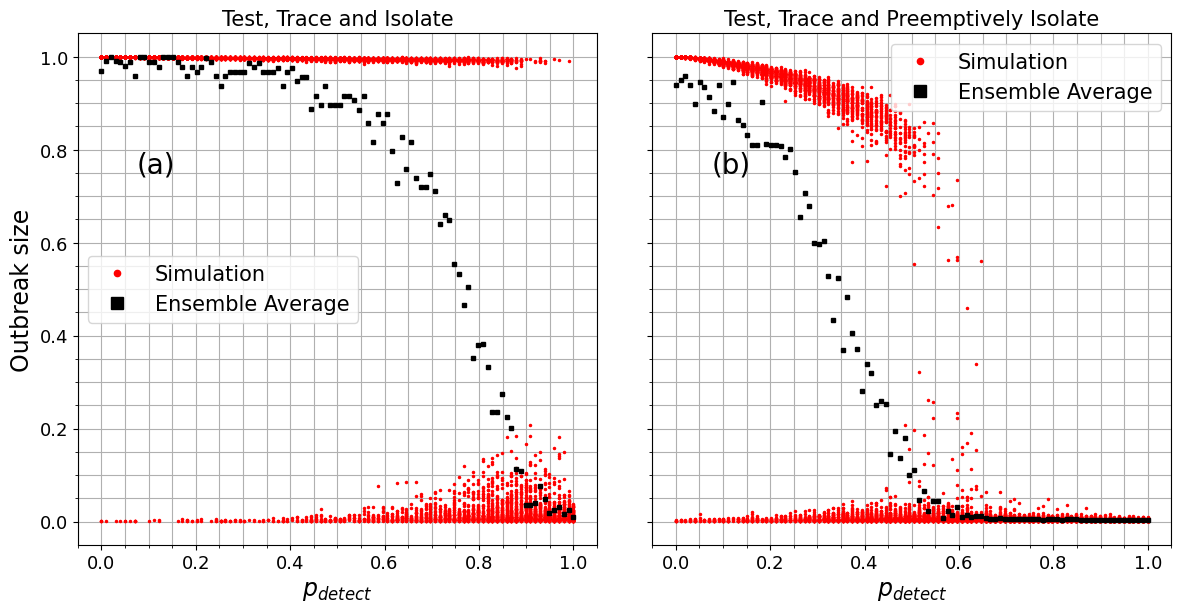

In [10]:
fig,  (ax1,ax2) = plt.subplots(1,2,  sharex=True, sharey=True, figsize=(12,6))

fig.tight_layout()

ax2.set_title('Test, Trace and Preemptively Isolate', fontsize=15)
ax1.set_title('Test, Trace and Isolate', fontsize=15)

mean_1 = df_1.groupby('pDetect')[SEIR.REMOVED].mean() / n
mean_2 = df_2.groupby('pDetect')[SEIR.REMOVED].mean() / n



ax2.plot(df_1["pDetect"],
        df_1[epydemic.SEIR.REMOVED] / n , 'r.', label="Simulation", markersize=3)

ax1.plot(df_2["pDetect"], df_2[epydemic.SEIR.REMOVED] /n, 'r.', label="Simulation", markersize=3)

ax2.plot(mean_1, 'k.', marker="s", label="Ensemble Average",  markersize=3)
ax1.plot(mean_2, 'k.', marker="s", label="Ensemble Average",  markersize=3)

ax1.text(0.075, 0.75, f"(a)", fontsize=20)
ax2.text(0.075, 0.75, f"(b)", fontsize=20)
ax1.set_ylabel('Outbreak size')
ax2.set_xlabel('$p_{detect}$')
ax1.set_xlabel('$p_{detect}$')

ax1.legend()
ax2.legend()

ax2.grid(which = "both")
ax1.grid(which = "both")
ax2.minorticks_on()
_ = plt.show()